## 한글 형태소 분석 ,시각화, 워드 클라우드 등. 
### 형태소 분석, 품사 태깅. 
### 데이터 : 샘플 데이터 , 페이스북 전자 신문에서 크롤링 한 임시 데이터로  대체 
### 설치 가 조금 복잡함.
### 1) jdk 17 이상 2) JPype(자바, 파이썬 연결하는 도구) 3) konlpy 패키지 설치. 

## 주의사항, JPype 버전 1.4,  파이썬 버전 3.10.7 다운그레이드 
## 시스템 환경 변수 , ex) JAVA_HOME : 경로 추가 하기. jdk 17
### 변수명 : JAVA_HOME (동일하게)
### 시스템 환경 변수의 경로 값 예제: C:\Program Files\Java\jdk-17\bin
### 변수명 : Path
### 경로 : C:\Program Files\Java\jdk-17\bin

## 파이썬 3.10.x , 예) 3.10.7 버전으로 다운 받기.
### 시스템 환경 변수 추가 작업

### 변수명 : Path
### 경로C:\Python\Python39\

### 변수명 : Path
### 경로C:\Python\Python39\Scripts

### cmd -> python -V

## 2) JPype(자바, 파이썬 연결하는 도구)
### 다운로드 사이트 주소 : https://github.com/jpype-project/jpype/releases
### JPype 검색하고, 버전은 jpype1-1.6.0-cp313-cp313-win_amd64.whl 받아서,
### 해당 다운로드 받은 폴더 이동하고, 해당 폴더 검색경로에서, cmd 실행하고,
### cmd -> pip install jpype1-1.6.0-cp313-cp313-win_amd64.whl
### pip install JPype1-1.4.1-cp310-cp310-win_amd64.whl
### 업그레이드 경고창 뜨면 :
### python.exe -m pip install --upgrade pip
### 업그레이드 후 , 다시 설치
### pip install jpype1-1.6.0-cp313-cp313-win_amd64.whl
### , 명령어 붙여넣기. 
### pip install konlpy 

### 코드 실행시, 설치한(다운그레이드한 버전, 3.10.7) 선택, 
### 해당 쥬피터 노트북 관련 커널 설치도 자동으로 함. 




# 용어 정리 
## 형태소 , 형태소 분석
### 형태소: 언어에서 의미가 가장 작은 단위. 
### 형태소 분석: 형태소, 어근, 접두사/접미사, 품사 등 다양한 속성 구조. 
### 품사 태깅 예) 상용 이가 좋아 하는 음식 은 국밥 이다. 
### 음식 : NNG, 이가/JKM , 좋아하는/VV, 이다/EFN , 높임말 : 하신다 -> 신/EPH
### 품사 태깅 해주는 패키지 : Hananum, Kkma, Komoran, Okt(Twitter 제공)
### Okt , 명사 /Noun , 에/ Josa, 먹는/ Verb , 다/Eomi 

# 샘플 데이터 사용. 
# 

In [20]:
# 최초 실행 때는, 설치 후에 주석하기. 
# !pip install matplotlib
# !pip install wordcloud

In [21]:
import json
import re 
# Okt , 한글 품사 태깅하기위한 모듈, 도구.
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
from wordcloud import WordCloud 



In [22]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기. 
# inputFileName = "./etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json"
inputFileName = "./부산서면맛집2_naver_news.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'cnt': 1,
  'description': '이 회사의 모회사인 애니플러스도 서울 합정동과 <b>부산 서면</b> 등에 일본 애니메이션과 협업해 굿즈를... 이은희 인하대 소비자학과 교수는 “돈키호테에서 이색적인 제품을 찾거나 일식 <b>맛집</b>을 발굴하는 등 색다르게... ',
  'link': 'https://n.news.naver.com/mnews/article/015/0005158079?sid=101',
  'org_link': 'https://www.hankyung.com/article/202507158979i',
  'pDate': '2025-07-15 13:13:00',
  'title': '&quot;일본 여행 온 것 같아요&quot; MZ들 우르르…한국인 일상 파고든 日'},
 {'cnt': 2,
  'description': "강남역 '일상비일상의틈'과 <b>부산 서면</b> '일상의틈' 매장에 중소기업 제품 판매 공간을 마련했다고 2일... 이용자가 원하는 조건의 장소를 대화형식으로 입력하면 개인의 취향과 라이프스타일에 맞는 <b>맛집</b>, 카페... ",
  'link': 'https://dealsite.co.kr/articles/143995',
  'org_link': 'https://dealsite.co.kr/articles/143995',
  'pDate': '2025-07-02 15:10:00',
  'title': "[재계는 지금] 인텔코리아 '2025 AI 서밋' 행사 성료 外"},
 {'cnt': 3,
  'description': "인근 <b>맛집</b>인 '이수가 본점'과 '카린지&amp;린가네 스낵바'와 협업한 상품을 선보인다. 기존 '강릉편(1탄)'과... 스타필드점 △<b>부산 서면</b>점 등 8개의 오프라인 매장과 인근 카페 및 소품숍 31곳이 함께한다. 이번 협업... ",
  'link': 'http://www.newsprime.co.kr/news/article.html?no=679327',
 

In [23]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업. 
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
  # if "message" in item.keys():
  if "description" in item.keys():
    # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함.
    # 하나의 임시 메세지 문자열 변수에 담기
    message = message + re.sub(r"[^\w]"," ", item["description"]) + ""
    # message = message + re.sub(r"[^\w]"," ", item["message"]) + ""
message

'이 회사의 모회사인 애니플러스도 서울 합정동과  b 부산 서면  b  등에 일본 애니메이션과 협업해 굿즈를    이은희 인하대 소비자학과 교수는  돈키호테에서 이색적인 제품을 찾거나 일식  b 맛집  b 을 발굴하는 등 색다르게    강남역  일상비일상의틈 과  b 부산 서면  b   일상의틈  매장에 중소기업 제품 판매 공간을 마련했다고 2일    이용자가 원하는 조건의 장소를 대화형식으로 입력하면 개인의 취향과 라이프스타일에 맞는  b 맛집  b   카페    인근  b 맛집  b 인  이수가 본점 과  카린지 amp 린가네 스낵바 와 협업한 상품을 선보인다  기존  강릉편 1탄  과    스타필드점   b 부산 서면  b 점 등 8개의 오프라인 매장과 인근 카페 및 소품숍 31곳이 함께한다  이번 협업    스타필드점   b 부산 서면  b 점 등 8개의 오프라인 매장과 인근 카페 및 소품숍 31곳이 함께한다  이번 협업    인근  b 맛집  b 인  이수가 본점 과  카린지 amp 린가네 스낵바 와 협업한 상품을 선보인다  기존  강릉편 1탄  과  충청도    론칭 이후 팬츠 누적 판매량만 500만장에 달하는 등  남성 팬츠  b 맛집  b   브랜드로 익숙하다  이번 다니엘    스타필드점   b 부산 서면  b 점 등 8개의 오프라인 매장과 인근 카페 및 소품숍 31곳이 함께한다  이번 협업    스타필드점   b 부산 서면  b 점 등 8개의 오프라인 매장과 인근 카페 및 소품숍 31곳이 함께한다  이번 협업    커뮤니티 가입 회원들은 방문 후기  백화점 이용 TIP  인근  b 맛집  b  정보 등을 공유하며 신세계와 함께한 다양한 일상과    야당 일각에선  지역  b 맛집  b  소개  계획이 세워진 것으로 알려져 찬반 여론이 대립했다  16일    같은 날 오후 4 6시  b 부산 서면  b  동천로 일대에서는 정권퇴진 b 부산  b 시민행동 주최로  28차 정권 파면 시민대회 가 실시됐다     기존 판매했던 점포들에 서울 지역 3

In [24]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N


['이',
 '회사',
 '모회사',
 '애니플러스',
 '서울',
 '합정동',
 '부산',
 '서면',
 '등',
 '일본',
 '애니메이션',
 '협업',
 '굿',
 '를',
 '이은희',
 '인하대',
 '소비자',
 '학과',
 '교수',
 '돈키호테',
 '이색',
 '제품',
 '일식',
 '맛집',
 '발굴',
 '등',
 '강남역',
 '일상',
 '비일',
 '상의',
 '틈',
 '과',
 '부산',
 '서면',
 '일상',
 '틈',
 '매장',
 '중소기업',
 '제품',
 '판매',
 '공간',
 '마련',
 '이용자',
 '조건',
 '장소',
 '화형식',
 '입력',
 '개인',
 '취향',
 '라이프스타일',
 '맛집',
 '카페',
 '인근',
 '맛집',
 '인',
 '이수',
 '본점',
 '과',
 '카린',
 '린',
 '스낵바',
 '협업',
 '상품',
 '기존',
 '강릉',
 '편',
 '과',
 '스타',
 '필드',
 '점',
 '부산',
 '서면',
 '점',
 '등',
 '개',
 '오프라인',
 '매장',
 '인근',
 '카페',
 '및',
 '소품',
 '숍',
 '곳',
 '이번',
 '협업',
 '스타',
 '필드',
 '점',
 '부산',
 '서면',
 '점',
 '등',
 '개',
 '오프라인',
 '매장',
 '인근',
 '카페',
 '및',
 '소품',
 '숍',
 '곳',
 '이번',
 '협업',
 '인근',
 '맛집',
 '인',
 '이수',
 '본점',
 '과',
 '카린',
 '린',
 '스낵바',
 '협업',
 '상품',
 '기존',
 '강릉',
 '편',
 '과',
 '충청도',
 '론칭',
 '이후',
 '팬츠',
 '누적',
 '판매량',
 '달',
 '등',
 '남성',
 '팬츠',
 '맛집',
 '브랜드',
 '이번',
 '다니엘',
 '스타',
 '필드',
 '점',
 '부산',
 '서면',
 '점',
 '등',
 '개',
 '오프라인',
 '매장',
 '인근',
 '카

In [25]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

Counter({'부산': 914,
         '서면': 772,
         '맛집': 668,
         '점': 352,
         '등': 270,
         '곳': 178,
         '이': 167,
         '서울': 138,
         '카페': 134,
         '지역': 114,
         '위치': 114,
         '게임': 101,
         '오픈': 95,
         '의': 94,
         '수': 89,
         '전국': 89,
         '대구': 82,
         '매장': 79,
         '유명': 74,
         '상권': 74,
         '은': 72,
         '소개': 69,
         '고객': 67,
         '홍대': 66,
         '인기': 64,
         '층': 64,
         '주변': 63,
         '거리': 62,
         '집': 60,
         '텔레콤': 60,
         '진구': 59,
         '개': 56,
         '세': 55,
         '과': 54,
         '직영': 51,
         '메뉴': 50,
         '시장': 49,
         '대표': 48,
         '로': 47,
         '것': 45,
         '동성로': 45,
         '대리점': 45,
         '백화점': 44,
         '롯데': 44,
         '로드': 44,
         '정보': 42,
         '최근': 42,
         '밀집': 42,
         '운영': 42,
         '보드게임': 42,
         '이랜드': 40,
         '타고': 40,
       

In [26]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(80):
  if(len(str(tag))>1):
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")
word_count

{'부산': 914,
 '서면': 772,
 '맛집': 668,
 '서울': 138,
 '카페': 134,
 '지역': 114,
 '위치': 114,
 '게임': 101,
 '오픈': 95,
 '전국': 89,
 '대구': 82,
 '매장': 79,
 '유명': 74,
 '상권': 74,
 '소개': 69,
 '고객': 67,
 '홍대': 66,
 '인기': 64,
 '주변': 63,
 '거리': 62,
 '텔레콤': 60,
 '진구': 59,
 '직영': 51,
 '메뉴': 50,
 '시장': 49,
 '대표': 48,
 '동성로': 45,
 '대리점': 45,
 '백화점': 44,
 '롯데': 44,
 '로드': 44,
 '정보': 42,
 '최근': 42,
 '밀집': 42,
 '운영': 42,
 '보드게임': 42,
 '이랜드': 40,
 '타고': 40,
 '야구': 40,
 '연습장': 40,
 '호떡': 39,
 '골목': 36,
 '소문': 36,
 '제휴': 36,
 '돼지국밥': 34,
 '도심': 34,
 '브랜드': 33,
 '식당': 33,
 '관계자': 33,
 '족발': 32,
 '지난': 31,
 '이번': 30,
 '일례': 30,
 '시작': 29,
 '최초': 29,
 '스시': 28,
 '쇼핑': 28,
 '통해': 28,
 '해운대': 28,
 '입점': 28,
 '방송': 28,
 '도로': 28}

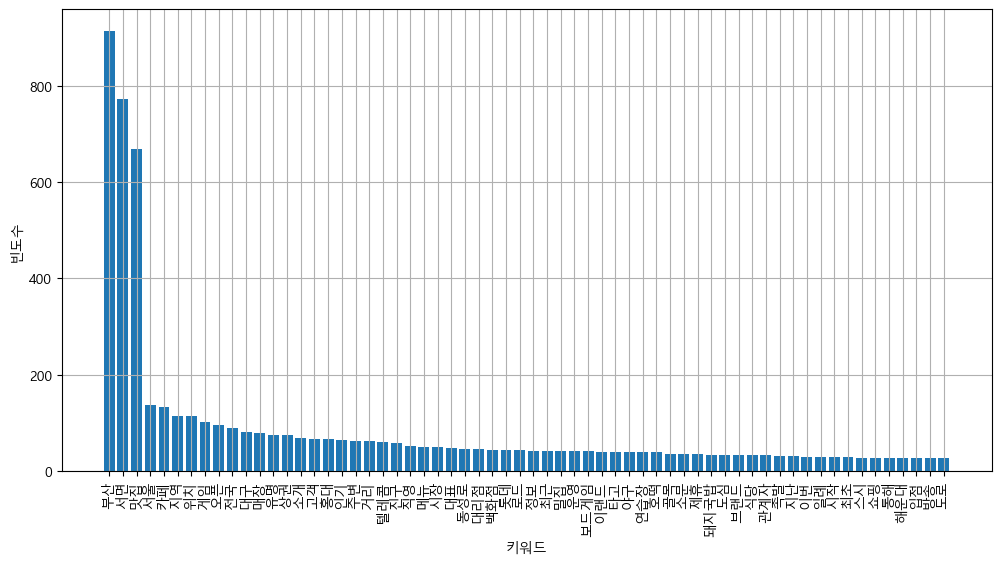

In [27]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [28]:
!pip install Numpy

Defaulting to user installation because normal site-packages is not writeable


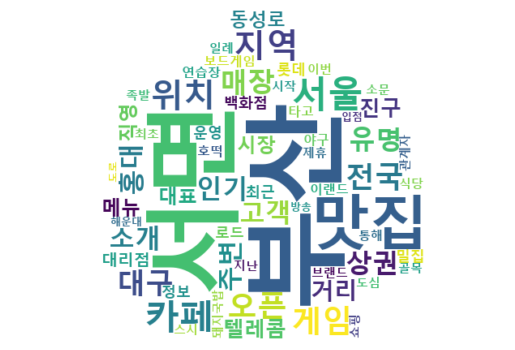

In [29]:
# 시각화2, 워드 클라우드 
import numpy as np

import os
import re
from PIL import Image
from os import path

alice_mask = np.array(Image.open("convert_test1.png"))

# 실행시, 한글이 깨져서, 해당 폰트 패스 경로 지정 필요.
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=alice_mask,width=800,height=1000)
# generate word cloud
sampleImage = wc.generate_from_frequencies(word_count)

# show
plt.imshow(sampleImage, interpolation="bilinear")
# plt.imshow(sampleImage)

plt.axis("off")
plt.show()

In [30]:
# 해당 출력을 이미지로 저장 하기. 
sampleImage.to_file(inputFileName + "_cloud.jpg")